# Анализ бизнес-показателей приложения Procrastinate Pro+

***Описание проекта:*** В ходе данного исследования нам предстоит побывать в роли аналитиков по маркетингу приложения Procrastinate Pro+(приложение развлекательного характера). К сожалению, в компании не все так гладко, и в последнее время она терпит убытки, несмотря на большие вложения в рекламу. Задачей же будет определить причины убытков, а таке помочь бизнесу увеличить прибыль, а также дать рекоммендации по маркетингу.

***Цель:*** Главной задачей данной работы будет определение причин убытков на основе данных о посещении пользователей, заказов и расходов на рекламу за период с 1 мая по 27 октября 2019 года.

***План работы:*** 

    1) В нашем распоряжении есть три датасета: лог сервера с данными об их посещениях, выгрузка покупок, рекламные расходы. Сперва откроем и сохраним датасеты, также просмотрим общую информацию по ним и взглянем на первые строчки.
    
    2) Вторым шагом будет предобрабокта данных, а именно: взглянем на пропуски и дубликаты, при необходимости скорректируем их, проверим верные ли типы данных у столбцов, по необходимости изменим названия столбцов.
    
    3) В данной работе довольно много дейтсвий, которые необходимо будет повторять, поэтому, чтобы избежать ошибок и сэкономить время, введем фнукции, которые помогут нам в дальнейшем анализе.
    
    4) Далее составим профили пользователей. Взглянем на страны, где больше всего было привлечено пользователей, наиболее популярные устройства среди них, просмотрим каналы привлечения пользователей, а также определим какие наиболее выгодные для компании. Будем рассматривать как общее кол-во пользователей, так и долю тех кто совершает покупки среди них.
    
    5) После перейдем к маркетингу, на этом шаге, необходимо будет рассчитать и просмотреть траты на весь маркетинг. Посмотрим сколько было потрачено на кампании с источникам в динамике по неделям, месяцам за весь период, визуализируем и оценим графики. Посчитаем сколько в среднем приходится платить компании за привлечение одного пользователя у данных источников.
    
    6) И наконец кульминацией нашей работы станет анализ бизнес-метрик нашей компании. Основные показатели, с которыми будем работать - ROI, LTV, CAC, Retention Rate, Conversion Rate. Просмотрим на общие тренды данных метрик по всем пользователям, взглянем сколько пользователей возращаются к нам, а также сколько в среднем остаются активными относительно первого дня привлечения. Просмотрим метрики в разрезе по когорта - region, channel, device, возможно проблема убытков кроется именно тут. Сопровождая анализ визуализацией, оценим как сгруппированные показатели, так и динамичные.
    
    7) На основе полученной информации, сформулируем вывод и напишем возможные действия для снижения расходов и увеличения прибыли.

## Первым делом импортируем необходимые нам библиотеки и откроем нужные файлы

In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv') 
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')
display (visits.head(5), orders.head(5), costs.head(5))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Взглянем на типы данных у каждого датафрейма

In [3]:
display(visits.info(), orders.info(), costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

None

None

None

Сперва, приведем названия столбцов к нижнему регистру

In [4]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()
visits = visits.rename(columns ={'user id':'user_id','session start':'session_start','session end':'session_end'})
orders = orders.rename(columns={'user id':'user_id','event dt':'event_dt'})

Изменим тип данных с object на datetime у столбцов с датами

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### Обработка пропусков и дубликатов

Просмотрим пропущенные значения по каждым столбцам у исходных датафреймов

In [6]:
display(visits.isna().sum(), orders.isna().sum(), costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

Пропусков не оказалость, взглянем на полные дубликаты

In [7]:
print('Дубликатов в датафрейме visits:',visits.duplicated().sum())
print('Дубликатов в датафрейме orders:', orders.duplicated().sum())
print('Дубликтов в датафрейме costs:', costs.duplicated().sum())

Дубликатов в датафрейме visits: 0
Дубликатов в датафрейме orders: 0
Дубликтов в датафрейме costs: 0


Также предлагаю просмотреть неявные дубликаты в таких столбцах как: region, device и channel. В этих столбцах может быть допущена ошибка в наименовании значений, что может в дальнейшем некорректно отразиться на анализе.

In [8]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [9]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [10]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [11]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [12]:
display(visits[{'user_id','region','device','session_start'}].duplicated().sum(), #Проверим еще на всякий случай дубликаты по определенным столбцам, однако и здесь тоже нету дубликатов.
        orders[{'user_id','event_dt'}].duplicated().sum())                        #Датафрейм costs првоерять не будем т.к. слишком мало строк

0

0

In [13]:
display(visits.head(5), orders.head(5), costs.head(5))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


В ходе подготовки данных к анализу:
    
    -Скорректировали названия столбцов;
    -Привели столбцы к необходимым типам данных;
    -Проверили датафреймы на дубликаты, как итог явных и неявных дубликатов в исходных данных нет;
    -Также проверили пропуски, которых также не оказалось.
    

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Введем функцию для создания пользовательский профилей.
"Скелетом" функции будет учебная.

In [14]:
def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start']) # Сортируем значени столбцов user_id, session_start по возрастанию
        .groupby('user_id')                                   # Группируем таблицу по столбцу user_id
        .agg(
            {                                                 # и находим первые встречающиеся значения у столбцов sessions_start
                'session_start': 'first',                     # channel, device, region
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})       # Переименовываем столбец session_start в first_ts 
        .reset_index()                                       # Обновляем индексы
    )

    profiles['dt'] = profiles['first_ts'].dt.date            # Добавляем столбец с датой в новый датафрейм, а также с номером месяца
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    

    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'].unique()) # Проверяем является ли пользователь покупателем

    new_users = (                                            # Далее считаем кол-во уникальных пользователей, сгрупированных по 
        profiles.groupby(['dt', 'channel'])                  # дате и источникам привлечения
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left') # Соедниняем колво пользователей и траты на реклкаму

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users'] # Находим среднюю стоимость привлечения пользователя

    profiles = profiles.merge(                                                 # Добавляем в итогоую таблицу
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)      # Заполняем пропуски 0, т.к. стоимость привлечения
                                                                               # органческих пользователей равна нулю
    return profiles

### Добавляем функция для расчета Retention Rate
За основу также возьмем учебную функцию

In [15]:
def get_retention(
    profiles, sessions, observation_date, horizon_days,dimensions=[], ignore_horizon=False   #При анализе Retention Rate, необходимо 
):                                                                             #учитывать горизонт анализа и его момент,
    dimensions = ['payer'] + dimensions                                        #поэтому дополнительно введем три переменные-
                                                                               #observation_time, horizon_days и ignore_horizone
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(         #1) Вводим дату, которая будет считаться последним 
            days=horizon_days - 1                                              # днем для анализа, если учитывать горизонт анализа,
        )                                                                      # то последней подходящей датой будет момент анализа
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')       # т.е. по сути день, когда мы анализируем данные
                                                                               # но в таком случае, изучаемые когорты могли
                                                                               # еще не полностью прожить горизнот анализа
    result_raw = result_raw.merge(                                             # и данные могут быть не полные, поэтому перманентно
        sessions[['user_id', 'session_start']], on='user_id', how='left'       # будем считать, что последней походящей датой будет
    )                                                                          # кол-во дней, которое указано в горизонте анализа, не
    result_raw['lifetime'] = (                                                 # считая дату момент анализа
        result_raw['session_start'] - result_raw['first_ts']                   #2) Отсекаем тех, кто не подходит под момент анализа 
    ).dt.days                                                                  #3) Далее находим лайфтайм для пользователя

    
    def group_by_dimensions(df, dims, horizon_days):                           #4) Задаем функцию для группировки таблицы по желаемым
        result = df.pivot_table(                                               # признакам
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (                                                       #5) Находим кол-во пользователей в когорте
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)     #6) Соединяем полученные таблицы  
        result = result.div(result['cohort_size'], axis=0)                     #7) Находим Retention Rate для когорт для каждого лайфтайма
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days) #8) Вводим необходимые переменные в функцию

    
    result_in_time = group_by_dimensions(                                      #8) Формируем таблицу динамики удержания
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time                          #9) Возвращаем сырую таблицу, сгруппированную по dimensions,
                                                                               #а также удержание в динамике

###  Вводим функцию get_conversion
По аналогии с предыдущими шагами, возьмем функцию get_conversion из учебного материала

In [16]:
def get_conversion(
    profiles,
    purchases,                                                                  # В этой функции потребуются данные, содержащиеся
    observation_date,                                                           # в датафрейме с покупками-заказами 
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    
    last_suitable_acquisition_date = observation_date                           #1) По аналогии с функцией get_retention определяем
    if not ignore_horizon:                                                      # последнюю дату, которая нам подойдет для анализа
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')        #2) Оставляем только даты не выходящие за момент анализа

    first_purchases = (                                                         #3) Находим даты первых заказов покупателей
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(                                              #4) Присоединяем таблицу с инфо о заказах с 
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'      # исходной отфильтрованной таблицей
    )

    result_raw['lifetime'] = (                                                  #5) Вычисляем лайфтайм действий для каждого пользователя
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
        
    if len(dimensions) == 0:                                                    #6) Добавим условие, что в случае отсутсвия признака группировки
        result_raw['cohort'] = 'All users'                                      # будет разделять когорты по датам начала пользования
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):                            #7) Далее вводим дополнительную функцию для
                                                                                # группировки таблицы по необходимым нам признакам
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        result = result.fillna(0).cumsum(axis = 1)                              #8) Заполняем пропуски и применяем метод суммы с накоплением
                                                                                # для расчета накопительной конверсии по когортам
        cohort_sizes = (                                                        #9) Находим размер когорт
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)     #10) Соединяем полученный таблицы двух предыдущих шагов

        result = result.div(result['cohort_size'], axis=0)                     #11) Находим доли кол-ва пользователей от общего числа
                                                                               # в когорте 
        result = result[['cohort_size'] + list(range(horizon_days))]           #12) Добавляем лайфтаймы
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days) #13) Добавляем датафрейм c результатами функции группировки
    
    if 'cohort' in dimensions:                                                 #14) Но для таблицы динамики уберем значние даты в dimensions
        dimensions = []        
        
    result_in_time = group_by_dimensions(                                      #15) Получаем таблицу динамики конверсии
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

### Задаем функция для подсчета LTV и ROI - get_ltv

In [17]:
def get_ltv(
    profiles,                                                           # Вводим необходимые переменные
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    
    last_suitable_acquisition_date = observation_date                   #1) Подбираем последний подходящий день
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date') #2) Фильтруем данные до подходящего дня

    

    result_raw = result_raw.merge(
        
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    
    result_raw['lifetime'] = (                                           #3) Находим лайфтайм
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:                                             #4) Задаем условие при отстутсвии признаков для когорт 
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    
    def group_by_dimensions(df, dims, horizon_days):                     #5) Вводим дополнительную функцию для создания сгрупированных
                                                                         # таблиц по признаку, значениями будут суммы выручки в лайфтаймы

        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',
            aggfunc='sum',
        )

        
        result = result.fillna(0).cumsum(axis=1)                         #6) Заменяем значения на накопленную сумму выручки

        
        cohort_sizes = (                                                 #7) Находим размер когорт
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0) #8) Добавляем когорты к таблице с накопленной выручкой

       
        result = result.div(result['cohort_size'], axis=0)               #9) Делим кол-во пользователей на выручку для нахождения
        result = result[['cohort_size'] + list(range(horizon_days))]     # средней выручки а пользователя
        result['cohort_size'] = cohort_sizes
        
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates() #10) Добавим также датафрейм с метрикой CAC
        cac = (                                                            #11) Сгруппируем данные по признаку когорт, для нахождения
            cac.groupby(dims)                                              #12) среднего значения стоимости привлечения
            .agg({'acquisition_cost': 'mean'})                           
            .rename(columns={'acquisition_cost': 'cac'})
        )

        
        roi = result.div(cac['cac'], axis=0)                               #13) Находим рентабельность

        
        roi = roi[~roi['cohort_size'].isin([np.inf])]                      #14) Убираем бесконечные значения

        
        roi['cohort_size'] = cohort_sizes

        
        roi['cac'] = cac['cac']                                            #15) Добавляем САС в таблицу с ROI


        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]      #16) Осталвяем в таблице рентабельности, только
                                                                           # показатель рентабельности, CAC и лайфтаймы
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(                     #17) Добавляем таблицу c результатами функции группировки                   
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:                                             #18) Но для таблицы динамики уберем значние даты в dimensions
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(                     #19) Получаем таблицу динамики LTV и ROI
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped,  
        result_in_time, 
        roi_grouped,  
        roi_in_time, 
    )

### Далее введем функция для визуализации полученных показателей

Сперва зададим функцию для сглаживания графиков от "шума" - filter_data

In [18]:
def filter_data(df, window):
    for column in df.columns.values:                      # Для каждого значения в каждом столбце принимаемого датафрейма, 
        df[column] = df[column].rolling(window).mean()    # будем брать среднее значение показателей
    return df

Далее вводим функция для построения графиков удержания

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Функция для визулизации конверсии

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

А также функция для визуализации рентабельности и ltv

In [21]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Профили пользователей

Используя функцию get_profiles, создадим профили пользователей.

In [22]:
profiles = get_profiles(visits, orders, costs)
display(
profiles.sort_values('dt').head(1),
profiles.sort_values('dt').tail(1),
f'Минимальная дата привлечения пользователей: {profiles.dt.min()}',
f'Максимальная дата привлечения ползователей: {profiles.dt.max()}')

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
110838,738227732207,2019-05-01 15:56:36,organic,Mac,United States,2019-05-01,2019-05-01,False,0.0


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
38973,258733560051,2019-10-27 13:49:05,FaceBoom,Android,United States,2019-10-27,2019-10-01,False,1.12657


'Минимальная дата привлечения пользователей: 2019-05-01'

'Максимальная дата привлечения ползователей: 2019-10-27'

Согласно условиям поставленной задачи, то у начало периода имеющихся данных приходится на 01.05.2019, а конец на 27.10.2019.
Полученные даты достоверны и согласуюся с условиями. Учитывая, что на календаре 01 ноября, есть предположение, что даты с 27.10 - 31.10 просто на просто не успели выгрузить, либо же мы получили данные ранее момента анализа

### Привлеченные пользователи в разрезе по странам

Найдем страны, из которых пользователи приходят в приложения, и какая среди них доля платящих пользователей.

In [23]:
region_profile = profiles.pivot_table(
    index = 'region',
    values = ['user_id', 'payer'],
    aggfunc = ({'user_id':'nunique', 'payer':'mean'})).rename(columns = {'payer':'share_payer','user_id':'count_users'}).sort_values('count_users', ascending=False)
region_profile['payers'] = (region_profile['count_users'] * region_profile['share_payer']).astype('int')
region_profile['not_payers'] = region_profile['count_users'] - region_profile['payers'].astype('int')
region_profile

,share_payer,count_users,payers,not_payers
region,,,,
United States,0.069019,100002,6901,93101
UK,0.039829,17575,700,16875
France,0.037994,17450,663,16787
Germany,0.041119,14981,616,14365


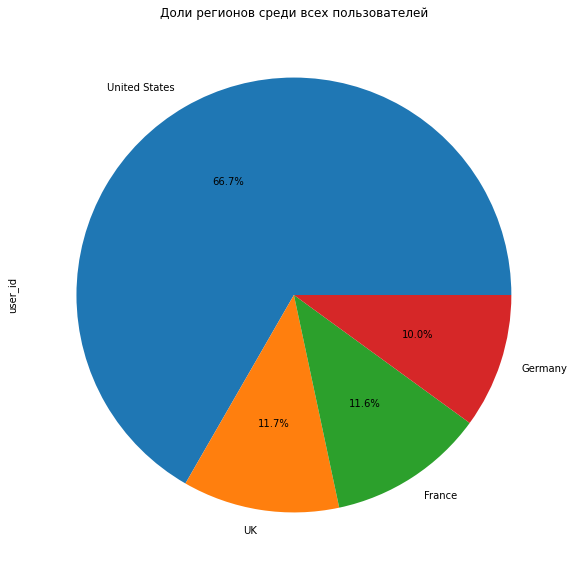

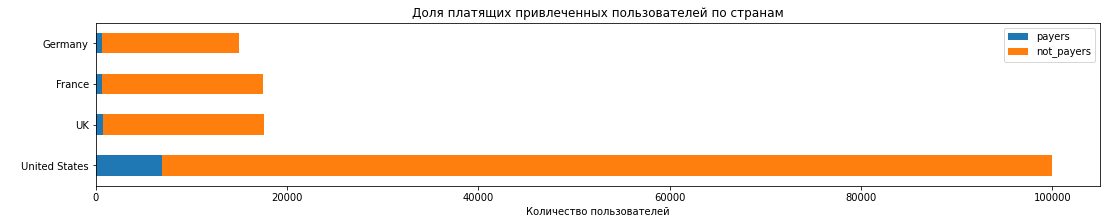

In [24]:
profiles.groupby('region')['user_id'].sum().sort_values(ascending=False).plot(kind='pie',figsize=(10,10),title='Доли регионов среди всех пользователей',autopct='%1.1f%%')
fig, ax = plt.subplots(figsize=(18, 3))
region_profile[['payers', 'not_payers']].plot(kind='barh', stacked=True, ax=ax)
ax.legend(bbox_to_anchor = (1, 1))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Доля платящих привлеченных пользователей по странам')
plt.show()


Промежуточный вывод:

    - Около двух трети пользователей было привлечено из United States;
    - Так же как и по кол-ву United States является лидером среди других регионов по доле платящих пользователей;
    - Наименьшее кол-во пользователей из региона Germany и составляет 10%;
    - Что касается таких регионов как: France, UK, то здесь картина примерно одинаковая, кол-во привлеченных пользователей ~ 17500(11.7% от общего кол-ва), доля платящих пользователей составляется - ~0.04.

### Кол-во пользователей в разрезе девайсов и доля платящих среди них

Итак, по аналогии с регоинами, сформируем таблицу, сгруппированную по девайсам, а также найдем долю платящих пользователей среди них

In [25]:
device_profile = profiles.pivot_table(
    index = 'device', 
    values = ['user_id', 'payer'],
    aggfunc={'user_id':'nunique','payer':'mean'}).rename(columns={'user_id':'count_users', 'payer':'share_payer'}).sort_values('count_users', ascending=False)
device_profile['payer'] = (device_profile['count_users'] * device_profile['share_payer']).astype('int')
device_profile['not_payer'] = (device_profile['count_users'] - device_profile['payer']).astype('int')
device_profile

,share_payer,count_users,payer,not_payer
device,,,,
iPhone,0.062079,54479,3382,51097
Android,0.058518,35032,2050,32982
PC,0.050468,30455,1537,28918
Mac,0.063644,30042,1912,28130


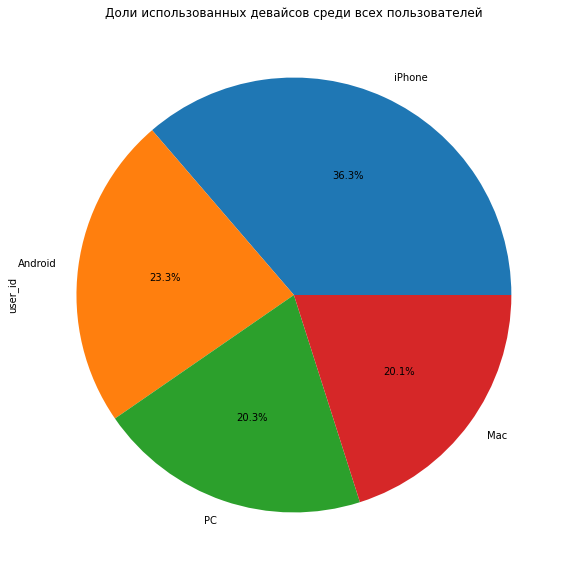

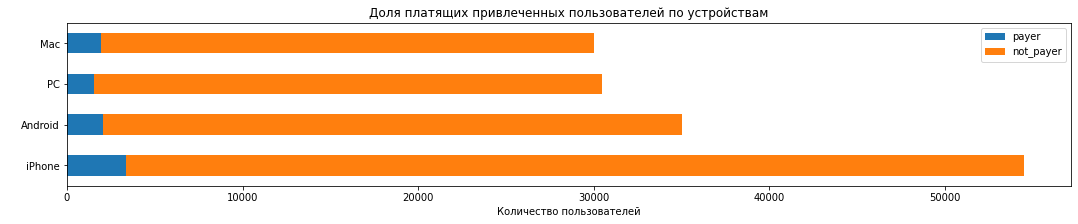

In [26]:
profiles.groupby('device')['user_id'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(10,10),title='Доли использованных девайсов среди всех пользователей',autopct='%1.1f%%')
fig, ax = plt.subplots(figsize=(18, 3))
device_profile[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax)
ax.legend(bbox_to_anchor = (1, 1))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Доля платящих привлеченных пользователей по устройствам')
plt.show()

Промежуточный вывод:
    
    - Самым популярным устройством среди пользователей является iPhone(около 36% на всех пользователей - ~54 500);
    - Далее идут девайсы Android, пользователей около 35 000 с долей платящих примерно в 6 процентов;
    - Наибольшая доля платящих пользователей у юзеров Mac и составляет 0.063, с отставанием меньше чем в процент идут пользователи iPhone; 
    - Пользователей Mac и PC примерно одинаковое кол-во ~ 30 тыс.пользователей.

### Каналы привлечения

In [27]:
channel_profile = profiles.pivot_table(
    index = 'channel', 
    values = ['user_id', 'payer'],
    aggfunc={'user_id':'nunique','payer':'mean'}).rename(columns={'user_id':'count_users', 'payer':'share_payer'}).sort_values('count_users', ascending=False)
channel_profile['payer'] = (channel_profile['count_users'] * channel_profile['share_payer']).astype('int')
channel_profile['not_payer'] = (channel_profile['count_users'] - channel_profile['payer']).astype('int')
channel_profile

,share_payer,count_users,payer,not_payer
channel,,,,
organic,0.020553,56439,1160,55279
FaceBoom,0.122049,29144,3557,25587
TipTop,0.096007,19561,1878,17683
OppleCreativeMedia,0.027077,8605,233,8372
LeapBob,0.030633,8553,262,8291
WahooNetBanner,0.052964,8553,453,8100
RocketSuperAds,0.079137,4448,352,4096
MediaTornado,0.035747,4364,156,4208
YRabbit,0.038265,4312,165,4147


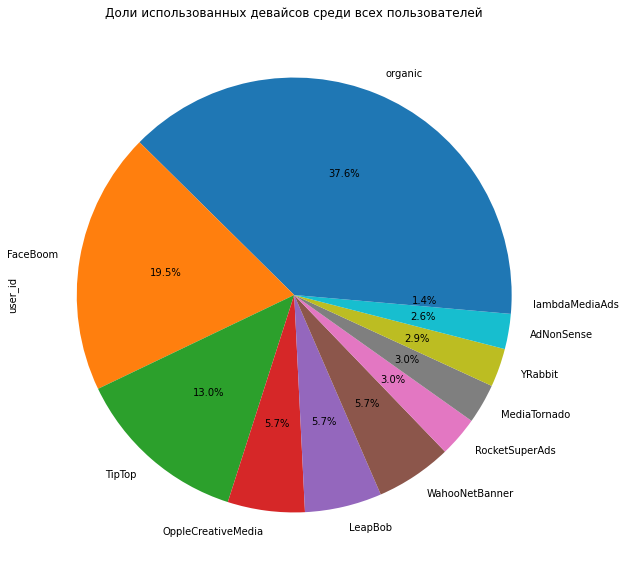

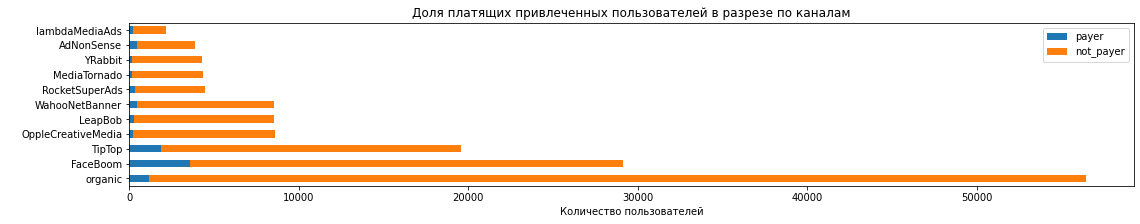

In [28]:
profiles.groupby('channel')['user_id'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(10,10),title='Доли использованных девайсов среди всех пользователей',autopct='%1.1f%%')
fig, ax = plt.subplots(figsize=(18, 3))
channel_profile[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax)
ax.legend(bbox_to_anchor = (1, 1))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Доля платящих привлеченных пользователей в разрезе по каналам')
plt.show()

    
    - С большим отрывом, лидер по кол-ву привлеченных источников является органика;
    - Далее идут FaceBoom и TipTop. Около трети пользователей узнали о приложении именно из этих источников;
    - Источником с самым высоким процентом платящих пользователей является FaceBoom, каждый десятый пользователь, привлеченных данной компании хоть раз совершал покупку, также высокий показатель и у TipTop, AdNonSense;
    - Наименьшее же кол-во пользователей были привлечены кампанией c lambdaMediaAds менее 2% на всех пользователей;
    - Самым маленьким содержанием платящих пользователей обладает OppleCreativeMedia около 2% в группе.

### Промежутоный вывод:

    В ходе исследовательского анализа, удалось определить:
    
    - Больше всего пользователей нашего приложения являются пользователи из United States, также в данном регионе самая высокая доля платящих пользователей;
    - Люди, впервые посетившие наше приложение, по большей части используют для этого телефон Android (23.3%) и iPhone (36.3%), также доля платящих пользователей у яблочнх устройств выше чем у других гаджетов;
    - Что касается каналов привлечения, то безусловно больше всего пользователей пришло "сами", однако так как у нас развлекательный контент, то предполагаю, что здесь сыграло сарафанное радио. Наболее большим кол-во платящих пользователей может похвастаться канал FaceBoom - 12%, довольно высокий резултат, особенно на фоне рейтинга по кол-ву пользователей, данный канал на втором месте;
    - Первый пользователь ознакомился с приложением - 01.05.2019, но по истечению 5 месяцев так ничего и не купил, однако т.к. он является органическим пользователем, то никаких затрат он за собой не принёс;
    - Последний же пользователь был привлечен 27.10.2019 через FaceBoom, однако и данный пользователь не является платящим, однако т.к. на календаре 1 ноября, то возможно просто не успел совершить покупку.
    

## Маркетинг

### Находим общую сумму расходов на маркетинг, а также отдельно по каждому источнику

In [29]:
f'Общая сумма расходов на маркетинг составляет: {costs.costs.sum().round(2)} денежных единиц'

'Общая сумма расходов на маркетинг составляет: 105497.3 денежных единиц'

Для расчета расходов по сгрупированным источникам будем использовать таблицу - costs

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

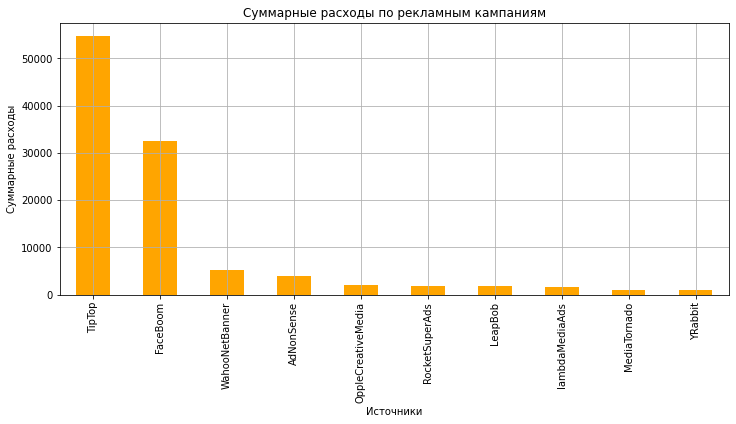

In [30]:
costs_channel = costs.groupby('channel')['costs'].sum().sort_values(ascending=False)
display(costs_channel)
costs_channel.plot(kind='bar', grid=True, figsize=(12,5),color = 'orange')
plt.xlabel('Источники')
plt.ylabel('Суммарные расходы')
plt.title('Суммарные расходы по рекламным кампаниям')
plt.show()

Мы видим слудющую картину:

    - Наибольшее кол-во денежных единиц было вложено в кампании с TipTop, однако исходя из предыдущей главы, эта рекламная компания занимает вторую строчку по привлечению пользователей, не считая органических;
    -Далее идет FaceBoom, расходов меньше, однако пользователей больше, чем TipTop, и доля платящих также выше у этой организации FaceBoom;
    - Самые низкие расходы у MediaTornado и YRabbit, однако данные компании и не привлекли большое кол-во пользователей;
    - Однако отдельного внимания заслужвает AdNonSense, расходы на рекламные кампании не такие высокие, в то же время показатель доли платящих пользователей среди привлеченных занимает второе место среди всех источников, хоть и общее кол-во привлеченных людей не такое высокое.

### Расходы на источники по неделям, месяцам 

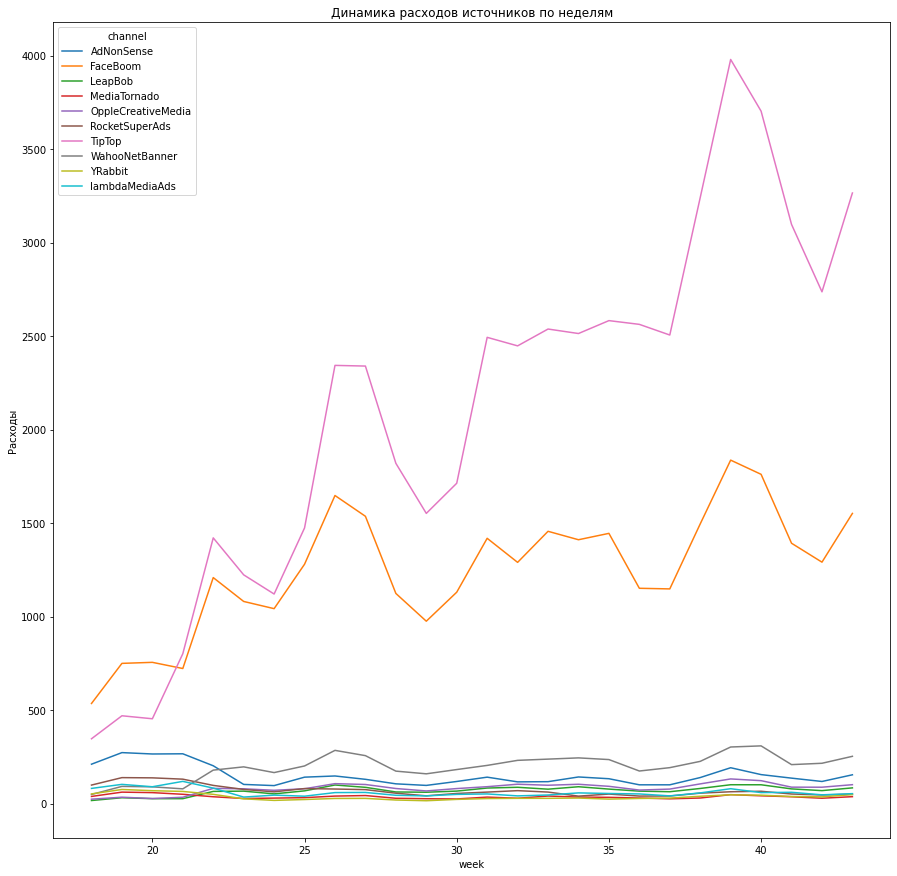

In [31]:
costs_channel_week = costs
costs_channel_week['dt'] = pd.to_datetime(costs_channel_week['dt'])
costs_channel_week['week'] = costs_channel_week['dt'].dt.isocalendar().week
costs_channel_week = costs_channel_week.pivot_table(index='channel', columns='week', values='costs', aggfunc=('sum'))
costs_channel_week.T.plot(figsize=(15,15))
plt.ylabel('Расходы')
plt.title('Динамика расходов источников по неделям')
plt.show()

Изучив график, можно сделать следующие выводы:

    - Во первых, сильно выделяются объемы расходов на такие организации как: TipTop и FaceBoom. Изначально на рекламу с данными компаниями было потрачено больше расходов, однако с течением времени они и дальше увеличиваются. Но графики имеют похожую динамику просадки в районе 24, 28, 36, 41 недели, также и подъема после 25, 28 и 36 недели.
    
    - Также можно отметить объем расходов на кампании с lambdaMediaAds изначально было вложено больше денежных едениц, в последсвтии траты на рекламные кампании сократились.
    
    -У кампаний с WahooNetBanner ситуация обратная, спустя время расходы на данную рекламную организацию начали увеличиваться и к концу 43 недели занимают третье месте по расходам.

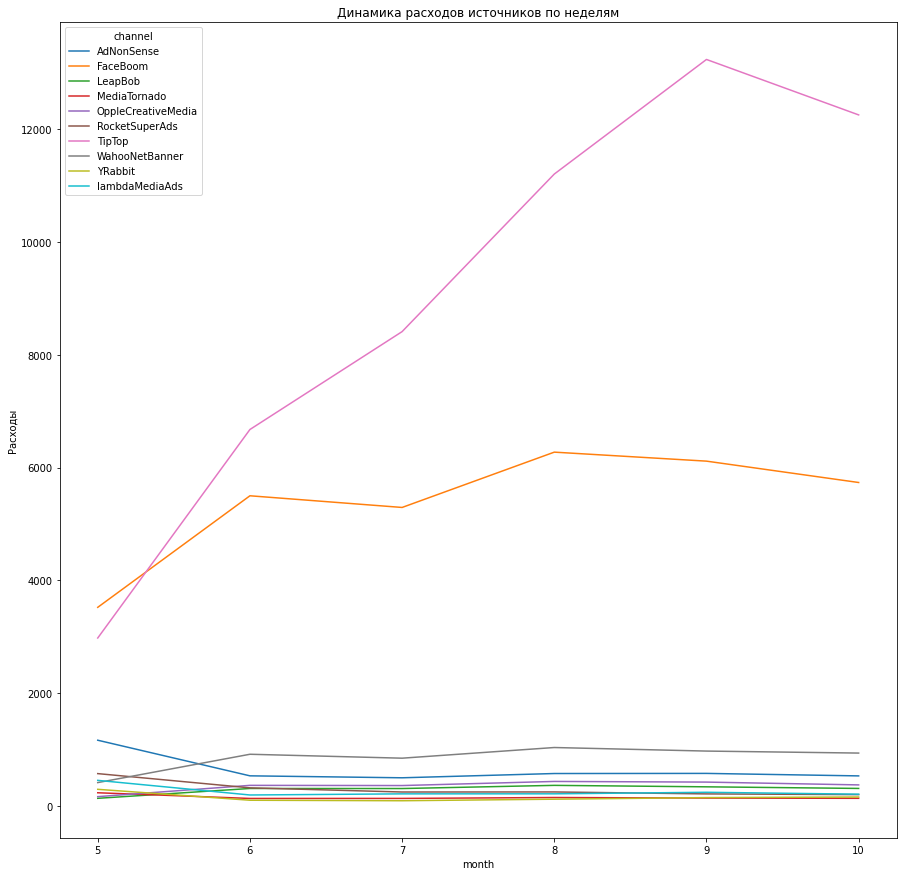

In [32]:
costs_channel_month = costs
costs_channel_month['dt'] = pd.to_datetime(costs_channel_month['dt'])
costs_channel_month['month'] = costs_channel_month['dt'].dt.month
costs_channel_month = costs_channel_month.pivot_table(index='channel', columns='month', values='costs', aggfunc=('sum'))
costs_channel_month.T.plot(figsize=(15,15))
plt.ylabel('Расходы')
plt.title('Динамика расходов источников по неделям')
plt.show()

На самом деле, мы видим анаогичную картину, но уже без "шума":

    -Рост объемов расход на такие ркламные органзации как TipTop и FaceBoom и падение в сентябре;
    -Также рост расход на WahooNetBanner;
    -Снижение расходов AdNonSense

### Среднее привлечение одного пользователя

Так как ранее мы вводили функцию get_profiles, в ней мы добавили столбец acquisition_cost, который и является средней стоимостью привлечения пользователя в данной когорте. Рассчитаем среднюю стоимость затрат по каналам.

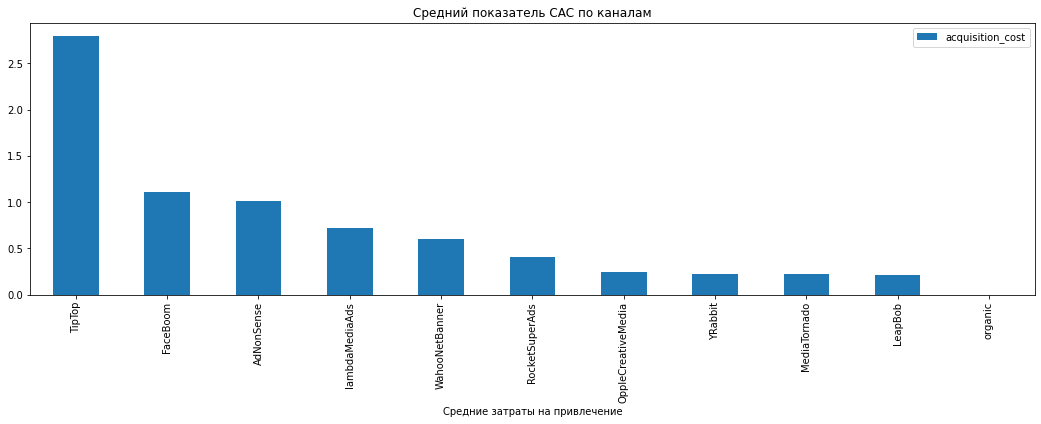

In [34]:
profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
    ).sort_values('acquisition_cost',ascending=False
    ).plot(kind='bar', figsize=(18,5))
plt.xlabel('Средние затраты на привлечение')
plt.title('Средний показатель CAC по каналам')
plt.show()

Как видно, набольшие расходы на привлечение пользователя у TipTop около 2.6 д.ед. на пользователя, более чем в два раза от следующего в списке(FaceBoom ~1.1). Стоит отметить и низкие показатели у OppleCreativeMedia, Yrabbit, MediaTornado LeapBob. Хоть у TipTop почти каждый десятый пользователь и является платящим, однако затраты на его привлечение довольно высокие чего не скажешь про FaceBoom.

Также предалгаю посмотреть как менялась динамика CAC по источникам со временем

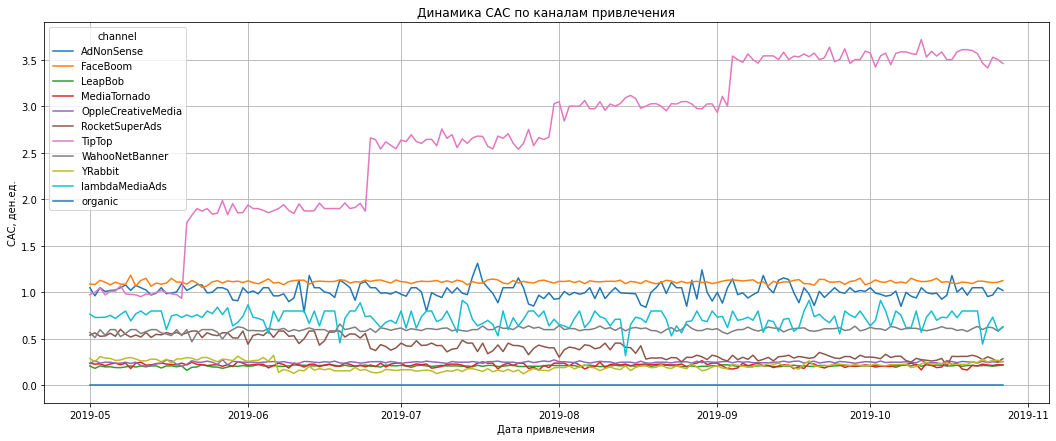

In [35]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(18, 7))
plt.ylabel('CAC, ден.ед.')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Больше похоже на кардиограмму... Применим фильтрацию данных с окном в 7 дней

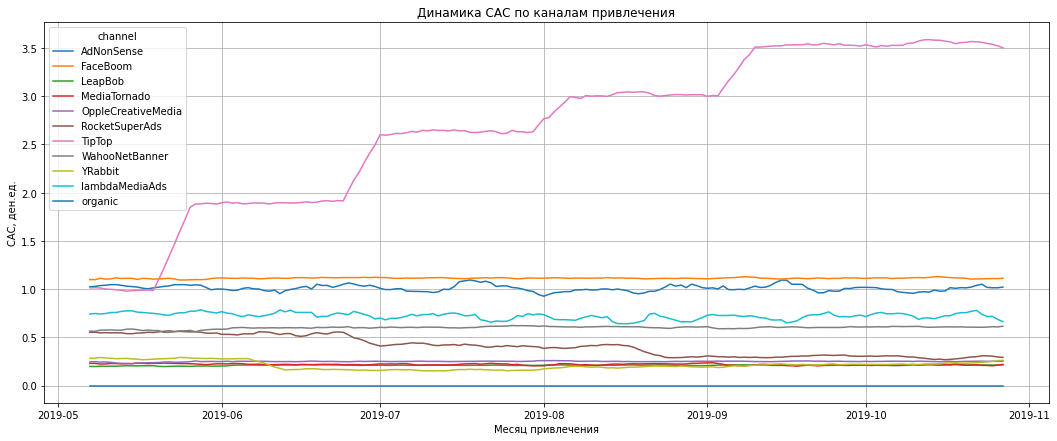

In [36]:
filter_profiles = profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')
filter_profiles = filter_data(filter_profiles, 7)
filter_profiles.plot(grid=True, figsize=(18,7))
plt.ylabel('CAC, ден.ед.')
plt.xlabel('Месяц привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Уже получше.

    - Видно, что высокий CAC у TipTop был не всегда, а увеличивается с каждым месяцем;
    - Также второй высокий показатель у FaceBoom был примерно одинаковый всегда;
    - Показатель САС у AdNonSense и lambdaMediaAds немного волатильный, однако всегда колеблеся на одном уровне(~1 и ~0.7  соотвественно);
    - САС RocketSuperAds с каждым месяцем падает, и достиг отметки низших САС показателей таких компаний как: YRabbit, MediaTornado, OppleCreativeMedia и др.

По итогам оценки маркетинга можно прийти к селудющему:
    
    - Наибольшие затраты как общие так и на пользователя на кампании с TipTop, однако стоит учитывать, что и пользователи пришедшие с этим источником, имеют высокий процент платящих;
    - Также, что касается организации FaceBoom, стабильный САС, высокий урвоень платящих пользователей, не высокие общие расходы относительно TipTop;
    - Снижение расходов на кампании с AdNoneSense, но уровень САС остается прежним, значит по логике и кол-во пользователей, пришедших от AdNoneSense становится меньше;
    - также можно сказать и про WahooNNetBanner с ростом кол-ва расходов, растет и кол-во пользователей, однако САС остается на прежнем урвоне (С - Стабильность);
    - По все остальным можно лишь сказать, что как расходы на данные кампании невысоки, так и их показатели САС

### Оценка окупаемости рекламы

Переходим к анализу бизнес метрик нашей компании. Для начала определимся с горизонтом и моментом анализа. В условиях поставленной задачи на данный момент времени 1 ноября 2019 года. Так как в бизнесе принято, что пользователи должны окупаться не позднее чем через 14 дней, то горизонтом анализа и возьмем две недели. Также предлагаю исключить органических пользователей, так как мы оцениваем бизнес показатели, связанные с маркетингом, а расходов на данных пользователей не было, поэтому исключим их из выборки.

In [37]:
profiles = profiles.query('channel != "organic"')
observation_date =  datetime(2019, 11, 1).date()
horizon_days = 14

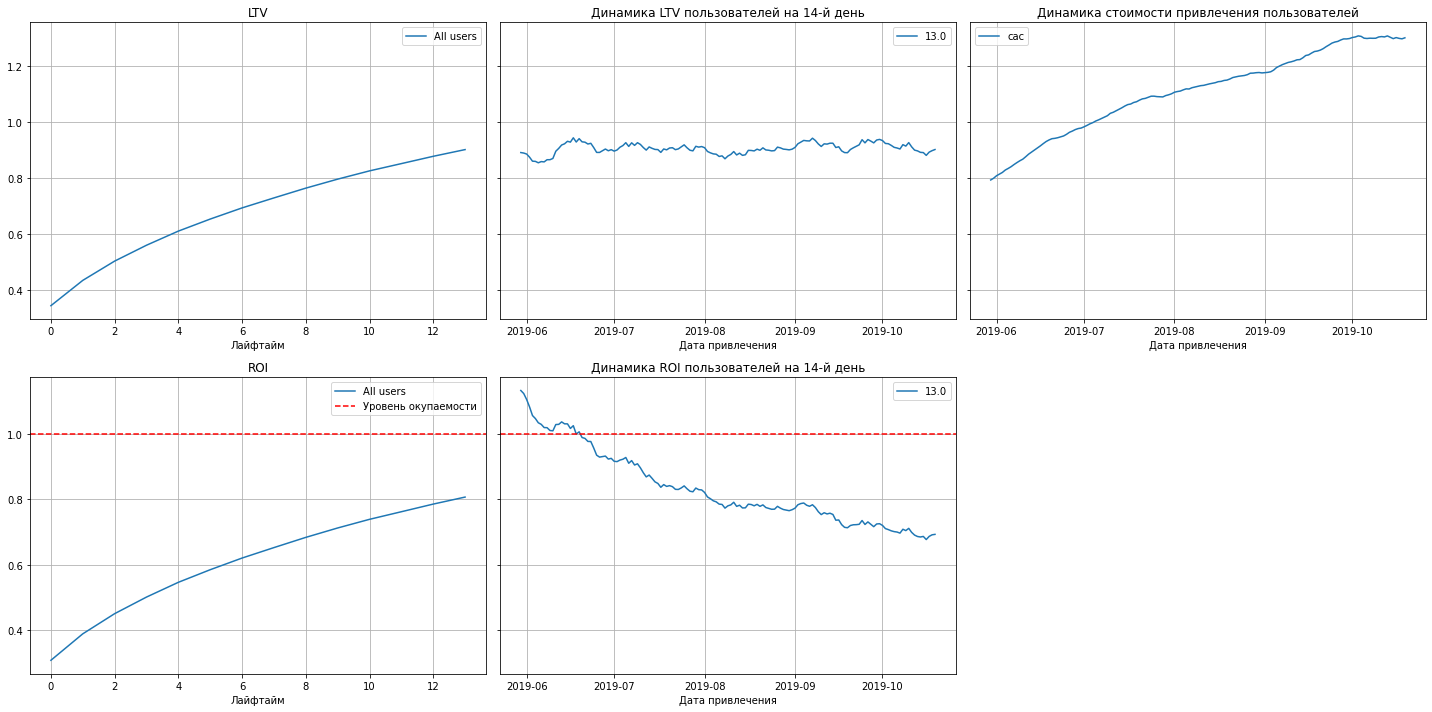

In [38]:
ltv_row, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=30)

Довольно низкий показатель окупаемости - около 80% на конец лайфтайма, т.е. реклама даже не окупается, а работает в минус компании. Что касается прибыли с пользователя, то она конечно стабильно растет, но составляет менее 1 д.е. 

По динамике рентабельности, можно заметить, что в последние месяца реклама перестала окупаться вообще, последний раз превышение прибыли над расходами было лишь в июне. ROI не только низкое, но еще и продолжает падать, а значит что-то точно не так.
По LTV все примерно на одном уровне, а значит сезонность и настроение пользователя тут не причем. 

С САС тоже не все гладко, точнее график то растет, но это как раз не есть хорошо, значит пользователей скорее всего приходит меньше, а затрат на их привлечения приходится делать больше.

### Конверсия и удержание пользователей

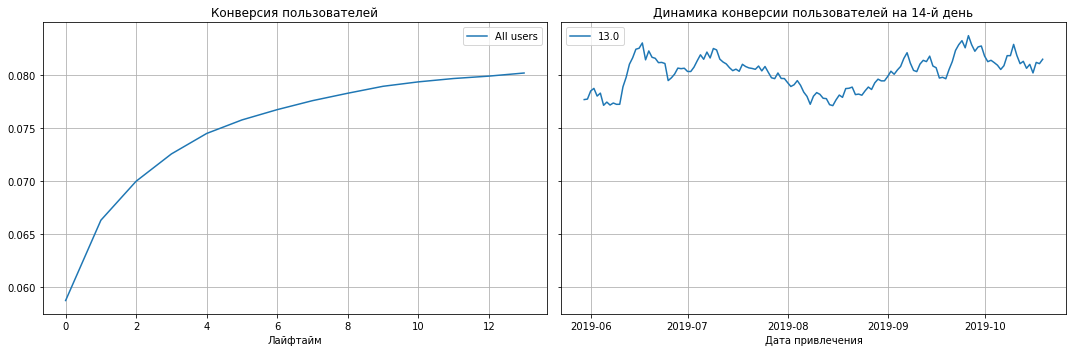

In [39]:
converson_row, conversion_group, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)
plot_conversion 
plot_conversion(conversion_group, conversion_history, horizon_days, window=30)

Основная масса пользователей возращается в первую неделю после визита приложения, в последующие же дни лайфтайма, конверсия увеличивается лишь на 0.5%. Это значит, что если пользователю понравилось приложение, то с большей долей вероятности он вернется к нему в течении недели, а после 8 дней маловероятно. Что касается динамики, то тут можно видеть, что в летний период, показатель повторного посещения падает, скорее всего люди просто отдыхают на природе или на море. Однако с приходом осени конверсия возрастает до прежних уровней начала лета.

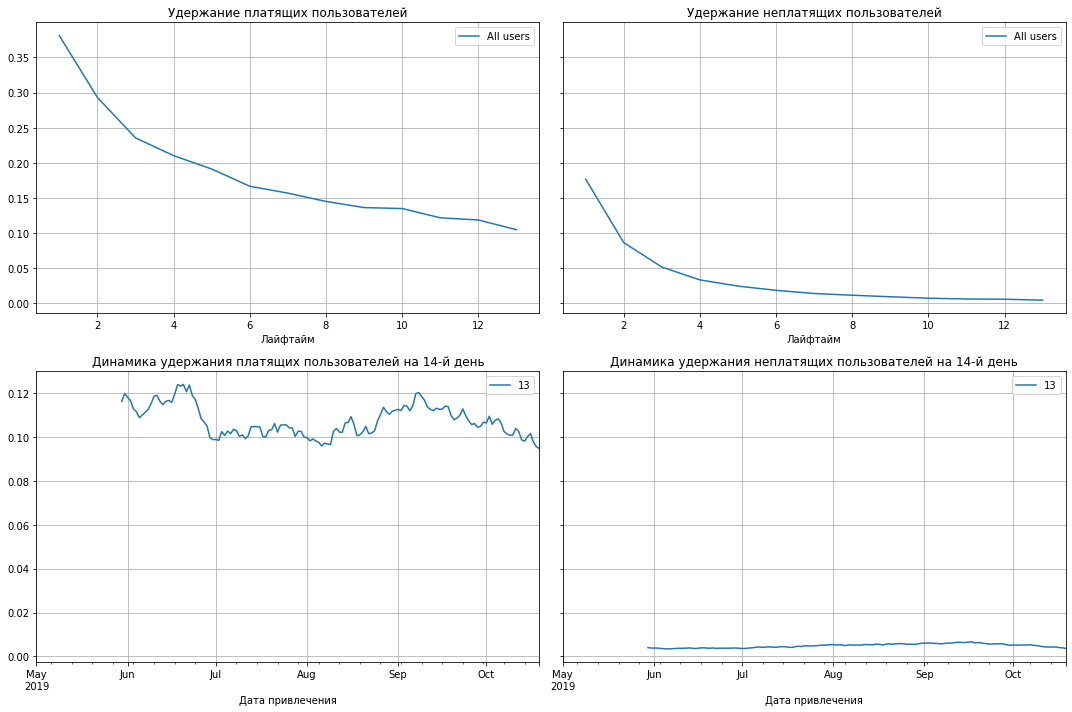

In [40]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days)
plot_retention(retention_grouped, retention_history, 14, window=30)

На самом деле, удержание платящих пользователей нельзя назвать не нормальным. На 14 день каждый 10 пользователь, который совершил покупку, совершает её еще раз, на мой взгляд, это довольно хорошо. Были не сильные просадки летом, однако к осени Retention_rate выровнялся до показателей начала лета, но вот в октябре начал вновь падать. Неплатящих пользователей довольно трудно удержать, т.к., если бы они были заинтересованы в приложении, то совершили бы покупку в первый 7 дней, но здесь же, мы видим, что после 3 дня менее 5% пользоваталей остаются.

### Окупаемость рекламы в разбивке по устройствам

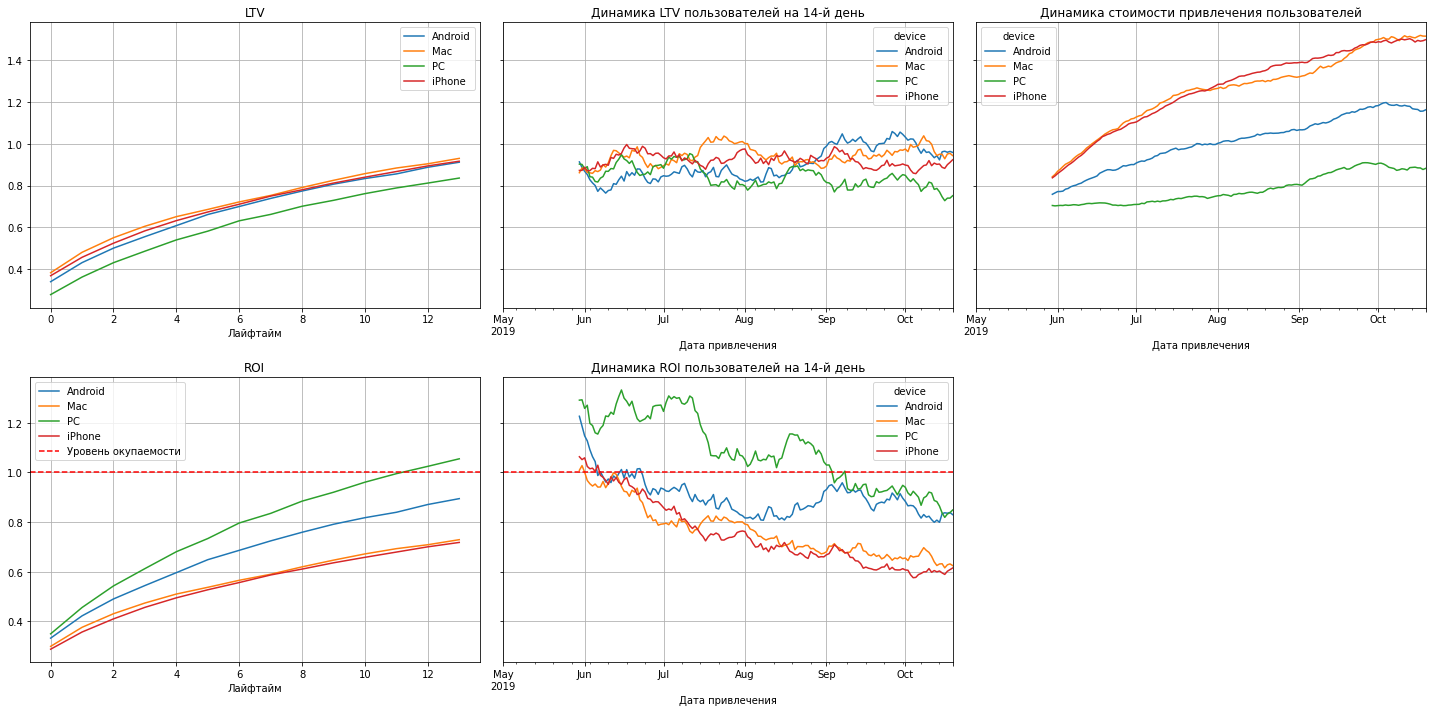

In [41]:
ltv_device_row, ltv_device_grouped, ltv_device_history, roi_device_grouped, roi_device_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions = ['device'])
plot_ltv_roi(ltv_device_grouped, ltv_device_history, roi_device_grouped, roi_device_history, 14, window=30)

Начнем с рентабельности. Из всех устройств окупаются лишь пользователи, которые использут PC, также Android-юзеры близки, но так и не достигли отметки в 100%. Однако это не говорит о том, что это хорошо для бизнеса, так как покрываются лишь расходы на пользователей PC, но они также не приносят как таковой прибыли. По другим девайсам все довольно печально: iPhone и Mac едва достигают отметки в 70% возможно, конечно, что существуют проблемы с приложением на IOS, но мало вероятно т.к. по все девайсам довольно низкие результаты. 

Про LTV: Тут у всех пользователей примерно одинаковая средняя приносимая прибыль, лишь у PC ниже дургих, но не аномально.

Про динамики показателей: У пользователей PC хоть и был довольно высокий уровень рентабельности, но в сентябре он перестал даже окупаться. По всем другим девайсам изначально довольно низкий ROI, да к тому же стабильно падает вниз, очень плохо. LTV у всех примерно одинаковый уровень, но как и на сгруппированном графике, PC ниже всех.

Что касается САС, то тут пользватели яблочных устройств явно лидеры, мало того, что стоимость их привлечения только растет, так еще у данных представителей самый низкий ROI. Общая картина САС - все стабильно растет, но не аномально.




### Окупаемость рекламы в разбивке по странам

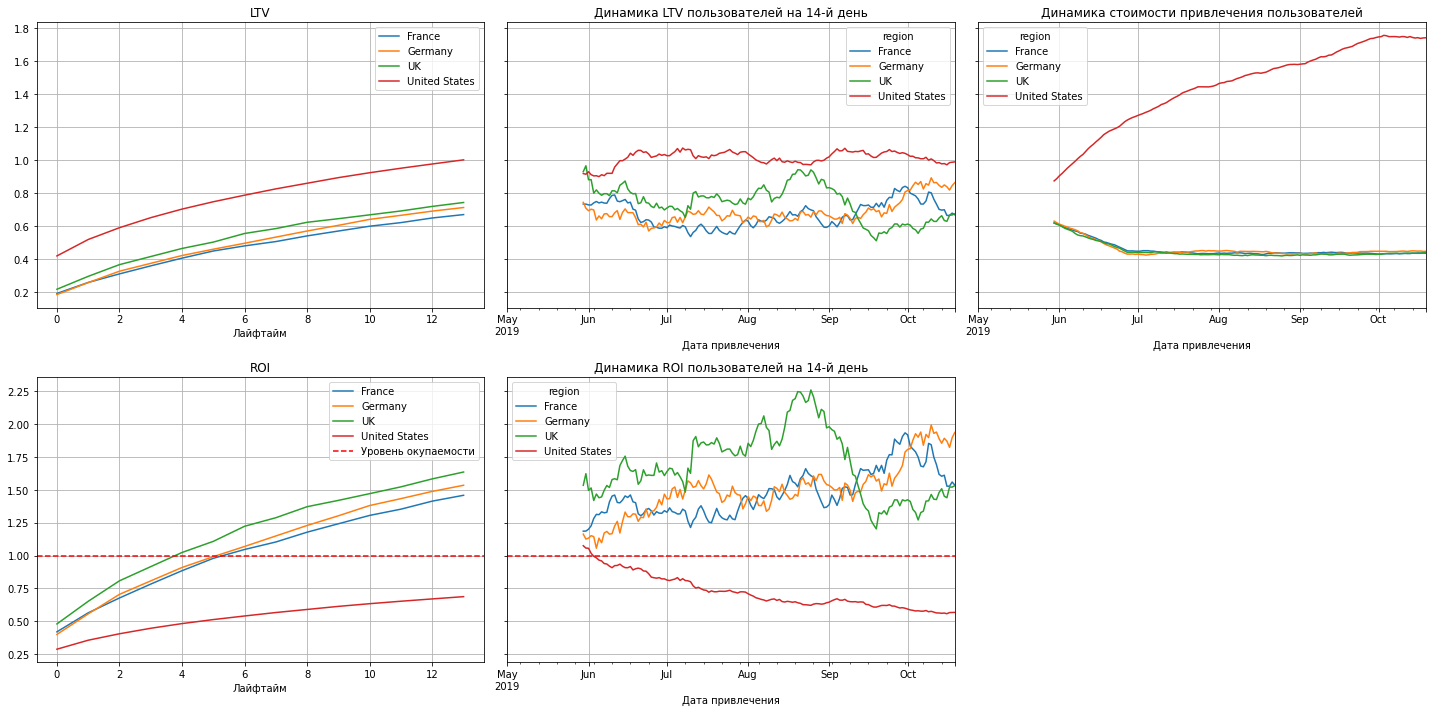

In [42]:
ltv_region_row, ltv_region_grouped, ltv_region_history, roi_region_grouped, roi_region_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions = ['region'])
plot_ltv_roi(ltv_region_grouped, ltv_region_history, roi_region_grouped, roi_region_history, 14, window=30)

ROI у всех стран достигает отметки в 100% уже на 5 день, но вот у United States даже к концу лайфтайма едва достигает 70%. А значит у United States явно что то пошло не так.

Но вот по LTV наоборот United States обладает наиболее высоким показателем средней прибыли с покупателя. По всем другим регионам примерно одинаковый урвоень, как в начале, так и в конце.

В динамике же видно, что изначально у United Stated не было как таковых трудностей с окупаемостью, но вот с начала лета показатель стремительно идет вниз. Также стоит отметить, что с начала осени ROI пользователей UK начинает довольно сильно проседать, но пока не упало ниже 100%, бить тревогу не стоит. По другим регионам рентабельность растет. По LTV можно отметить лишь падение UK у пользователей, привлеченных с сентября.

А вот с САС картина максимально странная. Стоимость привлечения пользователей United States резко возрос, начиная с июня, рост закончился лишь в октябре. САС United States сильно выше, чем у пользователей других регионов, у которых показатель, начиная с июля довольно стабилен. Возможно это связано с резко возросшей ценой рекламы у организаций региона United States, либо же сильной конкуренцией приложению, а в последсвтии резкое снижение кол-ва пользователей.

### Анализ окупаемости рекламы по каналам

Сперва получим датафреймы с LTV и ROI, используя  get_ltv

In [43]:
ltv_row, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'])

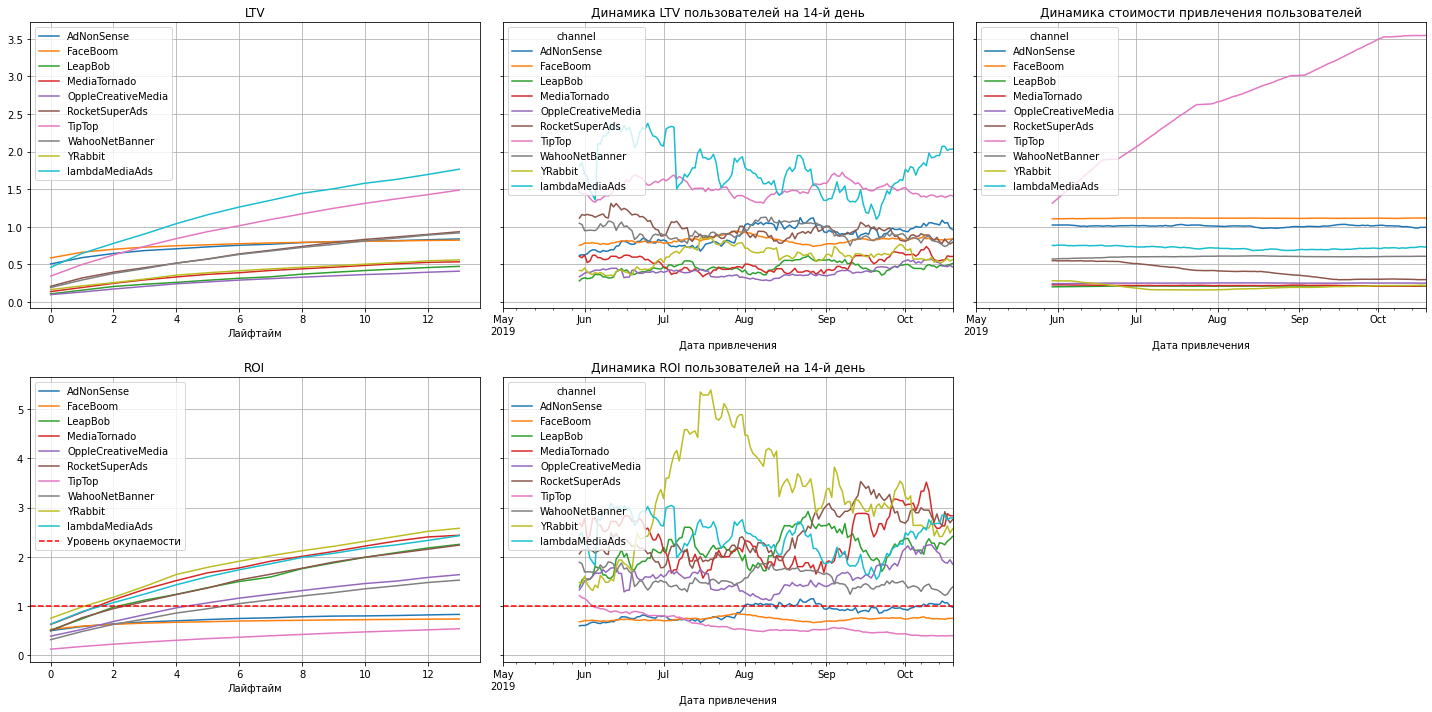

In [44]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=30)

Также рассмотрим графики конверсии и удержания в разрезе по каналам привлечения, чтобы увидеть сильные и слабые стороны.

Сперва взглянем на график конверсии

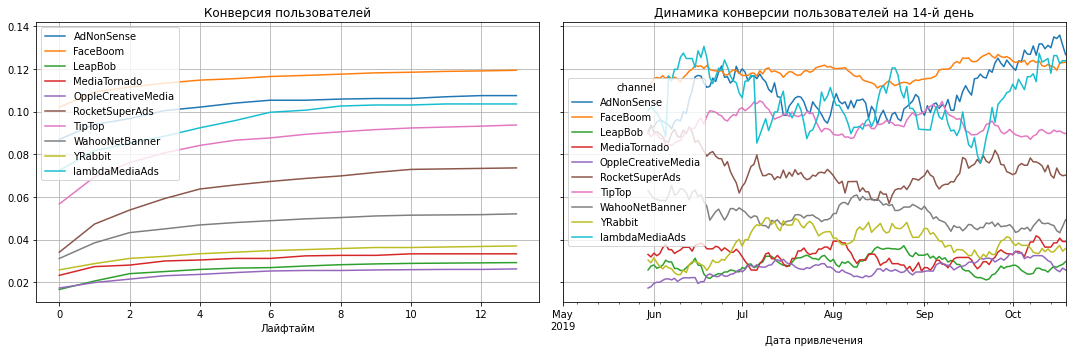

In [62]:
conversion_channel_raw, conversion_channel_grouped, conversion_channel_history =  get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_channel_grouped, conversion_channel_history, horizon_days, window=30)

На 14 день самой высокой конверсией обладет FaceBoom, AdNonSense и lambdaMediaAds. Самые низкие же показатели у YRabbit, MediaTornado, LeapBob, OppleCreatveMedia. В динамике же видим, что уровень высокой конверсии у FaceBoom, AdNonSense был всегда, касаемо labdaMediaAds показатель вырос за последние полтора месяца. Но каких то аномальных скачков или застоев в конверсии не наблюдается. А что же до наших не рентабельных источников (AdNonSense, FaceBoom, TipTop), то здесь конверсия так же стабильна, как и у всех других

Изучим удержание

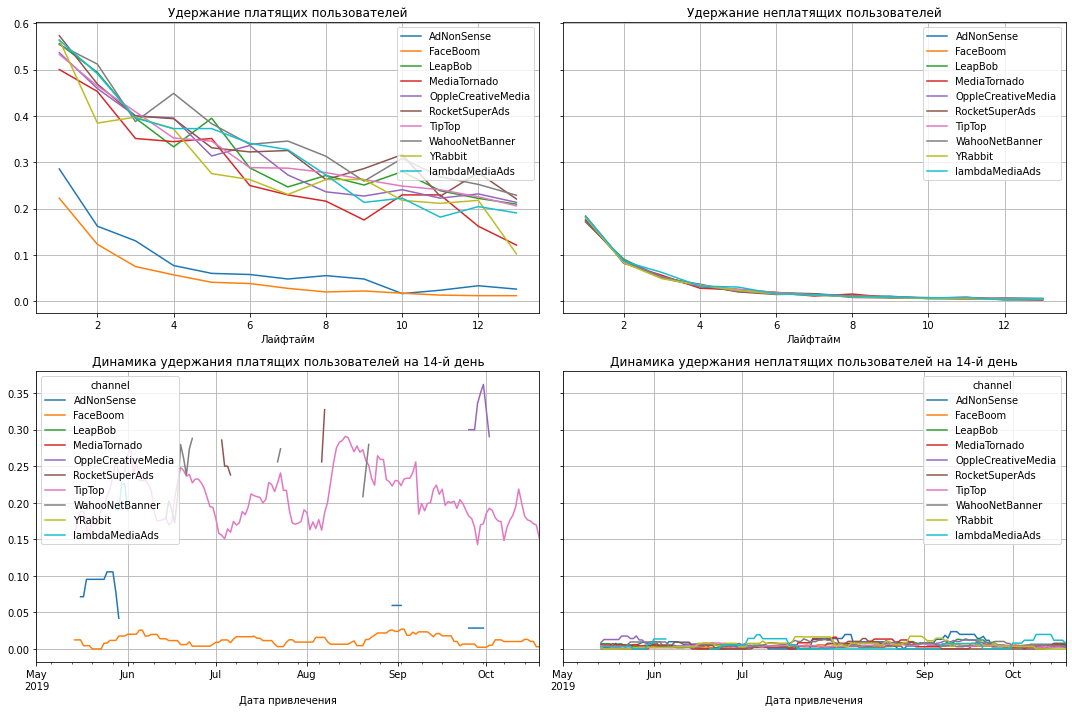

In [61]:
retention_channel_raw, retention_channel_grouped, retention_channel_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention_channel_grouped, retention_channel_history, horizon_days, window=14)

Первое, что бросается в глаза, это график динамики платящих пользователей. Не во всех источниках пользователи возвращаются в приложение на 14 день. В разные даты привлечения у разных источников пользователи могут вести себя совершенно по разному и общего тренда как такового нет: доля вернувшихся на 14 день, может быть как высокая ( в случае с OppleCreativeMeia в конце сентября), так и вовсе не возвращаться (YRabbit). Однако все же есть исключения: пользователи источников TipTop и FaceBoom. Обе эти группы доживают до конца лайфтайма, хоть и с переменным успехов: показатель у FaceBoom стабильно держится близко к нулю, а у TipTop довольно волатильный, но высокий.

Отдельно про общий график Retention Rate, здесь самыми низким показателями обладают источники AdNoneSense, FaceBoom около нуля к концу лайфтайма. А значит платящие пользователи плохо удерживаются, чего не скажешь про неплатящих. Значит скорее всего у источника FaceBoom и AdNonSense технические ошибки.

Промежуточный итог по окупаемости рекламы:

    - Большая часть рекламных кампаний окупается в первые 6 дней, почти все организации превысили отметку в 100%. Исключением же будут такие организации как: TipTop, FaceBoom и AdNonSense. Затраты на кампании с данными организациями выше, чем прибыль, которую приносят пользователи пришедшие с этих каналов. Возможно огромные инвестиции в два канала TipTop и FaceBoom не оправданы.
    - Что касается LTV, то здесь все довольно стабильно и резких скачков как таковых нет. Самый стремительный рост прибыли с клиентов у lambdaMediaAds, TipTop, WahooNetBanner. По всем остальным организациям рост есть, но довольно медленный.
    - По графикам динамики видно, что рентабельность зависит от сезона. Особенно это заметно у YRabbit, так как с началом лета окупаемость рекламы сильно выросла, но снижается к концу теплого времени года. Также можно сказать и про MediaTornad,lambdaMediaAds - рост окупаемости рекламы с началом осеннего времени года. А вот по FaceBoom, TipTop, AdNoneSense низкие показатели ROI не зависят от сезонности и были на протяжении всего периода.
    - А вот на динамике САС явно что то не так. Стоимость привлечения пользователей у TipTop слишком сильно растет. Это может говорит лишь об увеличении рекламных расходов без какого либо профита в прибавке пользователей.
    - Также по итогам визуализации конверсии и удержания, можно предположить о технических неполадках у пользователей, которые пришли с AdNonSense и FaceBoom.


### Итог анализа бизнес-метрик

Честно говоря, ситуация плачевная, но мы справимся!

А теперь по пунктам: 

    1) Низкие показатели ROI, на данный момент, рекама бизнеса работает только в убыток, ROI составляет около 80%, что довольно низко. LTV также не высокий - менее 1 д.е. на пользователя. В то время как затраты на привлечение того же самого пользователя составляют - 1.2 д.е. к концу октября.
    
    2) Наибольшее влияние на низкие показатели рекламы оказывают:
        2.1(По странам) Что-то явно происходит в регионе United States возможно рекламные кампании в данном регионе стали довольно высоко стоить, либо же конкуренция на этом рынке возросла, что впоследствии отразилось на оттоке пользователей. Хоть траты пользователей выше остальных регионов, однако стоимость данных пользователей слишком сильно выросла, а окупаемость не достигает 100%.
        2.2(По устройствам) Честно говоря, никаких сигналов в разбивке по устрйоствам не вижу. Рентабельность стабильно падает и довольно низкая, стоимость привлечения пользователей растет особенно высокая у iPhone и Mac.
        2.3(По источникам рекламы) Здесь отмечаем истоники - TipTop, AdNonSense и FaceBoom. Пользователи данных когорт не достигают отметки в 100% по ROI, и он был довольно низок на протяжении всего времени, независимо от даты привлечения. По всем остальным когортам все хорошо. LTV высокий у пользователей TipTop, lambdaMediaAds. В динамике же за последнее время рост у lambdaMediaAds, и высокий показатель TipTop на протяжении всего времени. По всем остальным когортам все стабильно. Касаемо стоимости привлечения, то можно отметить только TipTop так как резкий рост САС, начиная с лета.
        
    3) Отдельно остановимся на источниках TipTop, AdNonSense и FaceBoom: так как кампании с источниками совсем не окупаются, то скорее всего это рынок United States. Если с TipTop нужно полноценно разбираться в маркетинге и кампаниях, то с FaceBoom и AdNonSense ситуации менее критичны, источники почти окупаются, ROI выше чем у TipTop, а также CAC стабилен, чего не скажешь про данную метрику у TipTop, которая стремительно растет.  

Исходя из окупаемости рекламы по странам, а также учитывая информацию, полученную в ходе анализа когорт источников, необходимо тащтельно изучить кампании региона UnitedStates. В целом, канал FaceBoom и AdNonSense не плохие и их показатели можно улучшить, стоит проверить корректность работы приложения и оплаты именно у тех, кто пришел вместе с этими источникам, возможно дело именно в этом, так как слишком низкие изначальные уровни удержания при хорошей конверсии. Но вот с TipTop ситуация иная, тут необходимо капитально изучать кампании этой организации и понять в чем проблема,резкий и стремительный рост CAC, при хорошем LTV, возможно какие то технические неполадки связанные с переходом из внешнего источника или регистрацией пользователей.


## Вывод по исследованию

Проведя полный разбор маркетинга в нашей компании, получив на входе данные о посещениях пользователями сайта, информацию о заказах и стоимости расходов на рекламные кампании, мы пришли к следующему выводу:



1) Довольно качественные данные, так как с пропусками и дубликатами в датафреймах мы не столкнулись. Преобразовали лишь некоторые столбцы к необходимым типам данных, а также скорректировали наименования столбцов для удобства чтения. В ходе исследования потребовалось лишь добавить среднюю стоимость привлечения пользователей, а также номера месяцев и недель.

2) Для детального изучения бизнес метрик, построения по ним графиков и экономии времени, ввели необходимые нам функции .

3) В ходе исследовательского анализа выяснили, что первое привлечение пользователя состоялось в мае, а последнее в октябре 2019 года. Также просмотрели профили пользователей в разбивке по устройствам, странам, каналам привлечения и определили следующее
    
    1. Около трети пользователей нашего приложения находятся в United States, далее по всем регионом примерно одинаковое коль-во. Что касается платящих пользователей, то лидерство доли платящих также за United States.
    2. Чаще всего приложением пользуются с помощью телефона (iPhone/Android). Доли же платящих пользователей самые высокие у iPhone и Mac.
    3. Самым большим источником трафика является органика, далее FaceBoom и TipTop, по всем остальными сточникам менее 10 %. Наибольшие доли платящих пользователей у FaceBoom, AdNonSense и TipTop - ~10%.
    
4) Про расходы на маркетинг: Стоимость услуг TipTop самая высокая, а также на мой взгляд, не оправданная, не смотря на высокую долю платящих пользователей, так как САС также довольно высокий на фоне других орг-ий. Рост расходов на рекламные кампании данной организации только увеличивается. Также высокие показатели расходов и у FaceBoom, однако с ростом расходов растет и кол-во пользователей, пришедших по данному источнику, о чем говорит САС. По всем другим источникам ситуация стабильная.

5) И наконец оценка бизнес-метрик. Тут все довольно печально - реклама не окупается совсем. LTV хоть и растет, но меньше САС. Не плохой показатель Retention Rate около 10% у платящих пользователей. Наиболее печальная картина в регионе United States: ROI ниже всех и держится в районе 70%. Стомость привлечения растет в высоком темпе, что очень плохо. По устройствам все более менее гладко, но стоит обратиь внимание на пользователей iPhone и Mac, возможно есть какие то тех. неполадки в приложении. Про источники трафика: особенно выделяется орг-ия TipTop, FaceBoom и AdNoneSense. По источнику TipTop очень высокий рост САС, а рентабльность оставляет желать лучшего(~60%), хоть и LTV высокий. Также не окупается реклама с AdNonSense и FaceBoom. Но тут с большей долей вероятности происходит какая то тех. ошибка, т.к. пользователи хорошо конвертируются, но вот удержание именно платящих изнчально низкое и близко к нулю По другим источником все довольно стабильно и гладко.

Рекомендации

    - В первую очередь, необходимо детально изучить маркетинг в регионе United States, так как самый высокий САС и не окупаемая реклама именно здесь. Этот регион особенно важен, так как около двух трети пользователей именно с этого региона. Возможно, стоит сменить рекламные кампании, а также обсудить с источникам, как можно добиться более высоких показателей CR, CTR. 
    
    - Необходимо проверить корректность работы приложения на операционных системах IOS, так как САС выше других девайсов, возможно есть какие то тех. неполадки со скачиванием приложения или т.п., потому что LTV не разниться относительно других когорт. Также обратить внимание на корректность работы програмы у источников трафика AdNonSense и FaceBoom пользователи возвращаются, однако ничего не покупая.
    
    - Касаемо рекламных источников. Особое внимание стоит уделить расходу бюджета на кампании с TipTop. Самые высокие расходы на рекламу, самый высокий показатель САС, но кол-во привлеченных пользователей лишь на втором месте. Скорее всего это связано с невыгодными условиями оплаты, а также видом оплаты(клики, показы, регистрации). Из высоких показателей ROI за последнее время, можно выделить labmdaMediaAds и LeapBob, а labmdaMediaAds и в LTV. Метркии данных источников выросли в динамике за последнее время, возможно стоит присмотреться именно к ним и заключить больше рекламных кампаний именно с ними.

